In [4]:
import sympy as sp
from sympy.printing.latex import latex
from IPython.display import display, Math
# Define the symbols
a, b, c, q, D, D1,D2 = sp.symbols('a b c q D D1 D2')
# u, v= sp.symbols('u v')

# Define u and v
u = a
v = b / a

# Define R
R = c - u - v

In [2]:


# Define the matrix
A_q = sp.Matrix([
    [(b-1) - q**2 * (u + R)/R, a**2 - q**2 * u/R],
    [(-b) - q**2 * v/R, (-a**2) - q**2 * (R + v)/R]
])
A = sp.Matrix([
    [(b-1), a**2],
    [(-b), (-a**2)]
])
D_m = D*sp.Matrix([
    [(u + R)/R, u/R],
    [v/R,(R + v)/R]
])

A_q = A-q**2 *D_m
display((A_q))
# A_q = A+D
# Calculate the determinant
det_A_q = A_q.det()
# Expand and arrange by powers of q
det_A_q_expanded = sp.expand(det_A_q)
det_A_q_expanded_by_powers = sp.collect(det_A_q_expanded, q)
det_A_q_expanded_by_powers
# sp.simplify(det_A_q_expanded_by_powers)

display(sp.simplify(det_A_q_expanded_by_powers))
simplified = sp.simplify((det_A_q_expanded_by_powers.coeff(q,4)))
numer, denom = sp.fraction(simplified)

# Expand the numerator
expanded_numer = sp.expand(numer)

# Combine the expanded numerator with the original denominator
expanded_fraction = (expanded_numer / denom)
simplified = expanded_fraction
display(simplified)
latex = latex(simplified)
print(latex)

solution_b = sp.solve(det_A_q, b)[0]
solution_b = sp.simplify(solution_b)
display(solution_b)
print(solution_b)


Matrix([
[-D*q**2*(c - b/a)/(-a + c - b/a) + b - 1,        -D*a*q**2/(-a + c - b/a) + a**2],
[        -D*b*q**2/(a*(-a + c - b/a)) - b, -D*q**2*(-a + c)/(-a + c - b/a) - a**2]])

a*(-D**2*c*q**4 + D*q**2*(-a**2*c + a + b*c - c) + a**3 - a**2*c + a*b)/(a**2 - a*c + b)

-D**2*a*c/(a**2 - a*c + b)

- \frac{D^{2} a c}{a^{2} - a c + b}


(D**2*c*q**4 + D*a**2*c*q**2 - D*a*q**2 + D*c*q**2 - a**3 + a**2*c)/(D*c*q**2 + a)

(D**2*c*q**4 + D*a**2*c*q**2 - D*a*q**2 + D*c*q**2 - a**3 + a**2*c)/(D*c*q**2 + a)


In [8]:
## determinant calculation and neutral curve for determinant

A = sp.Matrix([
    [(b-1), a**2],
    [(-b), (-a**2)]
])
D_m = sp.Matrix([
    [D1*(u + R)/R, D1*u/R],
    [D2*v/R,D2*(R + v)/R]
])
A_q = A-q**2 *D_m

det_A_q = A_q.det()
det_A_q_expanded = sp.expand(det_A_q)
det_A_q_expanded_by_powers = sp.collect(det_A_q_expanded, q)
R_times_det = R*det_A_q_expanded
print(sp.simplify(det_A_q*R))
display(det_A_q)
B = sp.simplify(R*(det_A_q_expanded_by_powers.coeff(q,2)))
display(B)
neutral_curve_det = sp.solve(det_A_q,b)[0]
# print(neutral_curve_det)
display(neutral_curve_det)


D1*D2*c*q**4 + D1*a**2*c*q**2 - 2*D1*a*b*q**2 + 2*D2*a*b*q**2 - D2*a*q**2 - D2*b*c*q**2 + D2*c*q**2 - a**3 + a**2*c - a*b


(-D1*D2*a*c*q**4 - D1*a**3*c*q**2 + 2*D1*a**2*b*q**2 - 2*D2*a**2*b*q**2 + D2*a**2*q**2 + D2*a*b*c*q**2 - D2*a*c*q**2 + a**4 - a**3*c + a**2*b)/(a**2 - a*c + b)

D1*a**2*c - 2*D1*a*b + 2*D2*a*b - D2*a - D2*b*c + D2*c

(D1*D2*c*q**4 + D1*a**2*c*q**2 - D2*a*q**2 + D2*c*q**2 - a**3 + a**2*c)/(2*D1*a*q**2 - 2*D2*a*q**2 + D2*c*q**2 + a)

In [30]:
tr_A_q = A_q.trace()
display(tr_A_q)
tr_A_q_exp = sp.collect(sp.simplify(sp.expand(R*tr_A_q*a)),b)
display(tr_A_q_exp)
print(tr_A_q_exp)
neutral_curve_trace = sp.solve(tr_A_q_exp,b)[1]
# print(neutral_curve_trace)


-D1*q**2*(c - b/a)/(-a + c - b/a) - D2*q**2*(-a + c)/(-a + c - b/a) - a**2 + b - 1

-D1*a*c*q**2 + D2*a**2*q**2 - D2*a*c*q**2 + a**4 - a**3*c + a**2 - a*c - b**2 + b*(D1*q**2 + a*c + 1)

-D1*a*c*q**2 + D2*a**2*q**2 - D2*a*c*q**2 + a**4 - a**3*c + a**2 - a*c - b**2 + b*(D1*q**2 + a*c + 1)


Plotting the neutral curve for determinant


In [29]:
 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

def neutral_curve_tr_positive(D1,D2,c,a,q):
    return D1*q**2/2 + a*c/2 + np.sqrt(D1**2*q**4 - 2*D1*a*c*q**2 + 2*D1*q**2 + 4*D2*a**2*q**2\
     - 4*D2*a*c*q**2 + 4*a**4 - 4*a**3*c + a**2*c**2 + 4*a**2 - 2*a*c + 1)/2 + 1/2
def neutral_curve_tr_negative(D1,D2,c,a,q):
    return D1*q**2/2 + a*c/2 - np.sqrt(D1**2*q**4 - 2*D1*a*c*q**2 + 2*D1*q**2 + 4*D2*a**2*q**2\
     - 4*D2*a*c*q**2 + 4*a**4 - 4*a**3*c + a**2*c**2 + 4*a**2 - 2*a*c + 1)/2 + 1/2
    
def neutral_curve_det(D1, D2, c, a, q):
    """Compute the neutral curve b(q)."""
    numerator = D1*D2*c*q**4 + D1*a**2*c*q**2 - D2*a*q**2 + D2*c*q**2 - a**3 + a**2*c
    denominator = 2*D1*a*q**2 - 2*D2*a*q**2 + D2*c*q**2 + a
    return numerator / denominator

def plot_neutral_curve(D1, D2, c, a):
    """Plot the neutral curve b(q) interactively."""
    q = np.linspace(0, 10, 4000)  # Avoid q=0 to prevent division by zero
    b = neutral_curve_det(D1, D2, c, a, q)
    b_trplus=neutral_curve_tr_positive(D1,D2,c,a,q)
    b_trminus=neutral_curve_tr_negative(D1,D2,c,a,q)
    plt.figure(figsize=(10, 6))
    plt.plot(q, b, label=r'$b(q)$')
    plt.plot(q,b_trplus, label=r'$trace curve plus$')
    plt.plot(q,b_trminus, label=r'$trace curve_minus$')
    plt.title('Neutral Curve b(q)')
    plt.xlabel(r'$q$')
    plt.ylabel(r'$b(q)$')
    plt.grid(True)
    plt.legend()
    plt.ylim(-10, 40)  # Adjust the y-axis limits as needed
    plt.show()

# Define sliders for the parameters
interact(
    plot_neutral_curve,
    D1=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='D1'),
    D2=FloatSlider(min=0.1, max=300.0, step=0.1, value=1.0, description='D2'),
    c=FloatSlider(min=0.1, max=20.0, step=0.1, value=10.0, description='c'),
    a=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='a')
)


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.plot_neutral_curve(D1, D2, c, a)>

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import os
import datetime
def save_plot(fig, folder="plots/neutral_curves"):
    """ Save the given plot figure with a filename that includes the current date and time. """
    if not os.path.exists(folder):
        os.makedirs(folder)
    current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = os.path.join(folder, f"plot_{current_time}.png")
    fig.savefig(filename)
    print(f"Plot saved as {filename}")

## this should be just trace? Maybe trace * R
## This is tr(A_q * R). This doesn't affect the sign, nor the roots, so I'm just getting rid of denominator
def trace_times_R(D1, D2, c, a, b, q):
    """Compute the function f(b, q)."""
    return (-D1 * a * c * q**2 + D2 * a**2 * q**2 - D2 * a * c * q**2 +\
            a**4 - a**3 * c + a**2 - a * c - b**2 +\
            b * (D1 * q**2 + a * c + 1))
## det A_q times R function. Doesn't affect roots, nor sign 
##(because R depends only on a,b,c and there are bounds on b), gets rid of the annoying denominator
def det_times_R(D1,D2,c,a,b,q):
    return D1*D2*c*q**4 + D1*a**2*c*q**2 - 2*D1*a*b*q**2 +\
        2*D2*a*b*q**2 - D2*a*q**2 - D2*b*c*q**2 + D2*c*q**2 - a**3 + a**2*c - a*b

def neutral_curve_det(D1, D2, c, a, q):
    """Compute the neutral curve b(q)."""
    numerator = D1*D2*c*q**4 + D1*a**2*c*q**2 - D2*a*q**2 + D2*c*q**2 - a**3 + a**2*c
    denominator = 2*D1*a*q**2 - 2*D2*a*q**2 + D2*c*q**2 + a
    return numerator / denominator


def plot_f(D1, D2, c, a, save = False):
    """Plot the function f(b, q) as a 2D plot with color-coded values."""
    q_values = np.linspace(0, 10, 400)  # Avoid q=0 to prevent division by zero
    ## maximum b allowed to be taken
    max_b = c*a-a*a
    b_values = np.linspace(0, min(max_b, 300), 400)
    
    Q, B = np.meshgrid(q_values, b_values)
    F = trace_times_R(D1, D2, c, a, B, Q)
    G = det_times_R(D1,D2,c,a,B,Q)
    fig = plt.figure(figsize=(10, 6))
    
    # Mask values near zero to apply special coloring
    masked_F = np.ma.masked_where(np.abs(F) < 0.1, F)
    
    plt.contourf(Q, B, masked_F, levels=50, cmap='viridis', extend='both')
    
    # Add colorbar
    cbar = plt.colorbar(label=r'$f(b, q)$')
    cbar.ax.set_ylabel(r'$f(b, q)$')
    
    # Set special color for near-zero values
    plt.contour(Q, B, F, levels=[-0.1, 0.1], colors='red', linestyles='solid')
    plt.contour(Q, B, F, levels=[5,5.1], colors='black', linestyles='dotted')
    plt.contour(Q, B, G, levels=[-0.1, 0.1], colors='blue', linestyles='solid')
    plt.contour(Q, B, G, levels=[1,1.1], colors='blue', linestyles='dotted')

    

    
    plt.title(r'Plot of $f(b, q)$')
    plt.xlabel(r'$q$')
    plt.ylabel(r'$b$')
    plt.grid(True)
    plt.suptitle(f"a={a:.2f},c={c:.2f},D1={D1:.2f},D2={D2:.2f}")
    plt.text(1.05, 1.05, 'neutral curve det A_q', fontsize=14, color='blue', transform=plt.gca().transAxes, ha='center')
    plt.text(1.05, 1.1, 'neutral curve tr A_q', fontsize=14, color='red', transform=plt.gca().transAxes, ha='center')

    plt.show()
    if save == True:
        save_plot(fig)
# Define sliders for the parameters
interact(
    plot_f,
    D1=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='D1'),
    D2=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='D2'),
    c=FloatSlider(min=0.1, max=20.0, step=0.1, value=10.0, description='c'),
    a=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='a')
)


interactive(children=(FloatSlider(value=1.0, description='D1', max=10.0, min=0.1), FloatSlider(value=1.0, desc…

<function __main__.plot_f(D1, D2, c, a, save=False)>

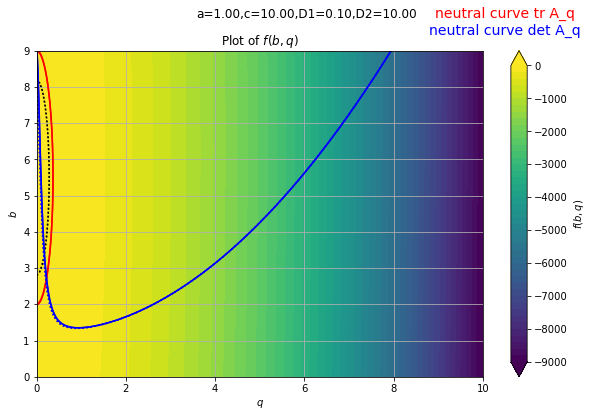

Plot saved as plots/neutral_curves/plot_20240715_135255.png


In [50]:
D1,D2 = 0.1, 10
a=1
c=10
plot_f(D1,D2,c,a, save=False)